In [1]:
import pandas as pd
import numpy as np
#from polygon import RESTClient
import datetime
import json
import requests
import os
import math
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def financials(ticker):
    financials = "https://api.polygon.io/v2/reference/financials/"+ticker+"?limit=80&type=Q&apiKey=XrTJjjYQpsWD5i9Gn1vBE1LEu1J1R5gJ"
    response_data = requests.get(financials).json()
    df = pd.DataFrame(response_data['results'])
    #df = df[["calendarDate", "assetsCurrent", 'cashAndEquivalentsUSD', "sharePriceAdjustedClose", 'investmentsCurrent', 'assetsCurrent', 'debtToEquityRatio', 'debtUSD', 'dividendYield', 'earningsBeforeInterestTaxesDepreciationAmortizationUSD', 'EBITDAMargin', 'shareholdersEquityUSD', 'enterpriseValue']]
    return df

In [5]:
tickers = ['HD']#, 'LOW', 'CAT', 'KR', 'WMT']
test_df = pd.DataFrame()
for ticker in tickers:
    print(ticker)
    data = financials(ticker)
    #data = data.set_index('calendarDate')
    data = data.drop(['ticker', 'period', 'reportPeriod', 'updated', 'dateKey' ], axis=1)
    data = data.add_prefix(f'{ticker}_')
    test_df = pd.concat([test_df, data], axis=1, join='outer')



HD


In [6]:
test_df = test_df.rename(columns={'HD_calendarDate': 'calendarDate'})

#for ticker in tickers[1:]:
#    test_df2 = test_df.drop([f'{ticker}_calendarDate'], axis=1)

In [7]:
test_df=test_df.set_index('calendarDate')


In [ ]:
#ev_df = pd.DataFrame()
#ev_ebitda_df = pd.DataFrame()

#for ticker in tickers:
#    ev_df = pd.concat([ev_df,test_df[f'{ticker}_enterpriseValue']], axis=1, join='outer')
#    ev_ebitda_df = pd.concat([ev_ebitda_df,test_df[f'{ticker}_enterpriseValueOverEBITDA']], axis=1, join='outer')



In [5]:
#ev_ebitda_df
#ev_data = test_df.drop(['HD_enterpriseValueOverEBITDA'], axis =1)

In [8]:
return_period = 2

Y = np.log(test_df.loc[:,'HD_enterpriseValueOverEBITDA']).diff(return_period).shift(-return_period)
Y.name = Y.name +'_pred'
#Y = Y.rename(columns={'HD_enterpriseValueOverEBITDA': 'HD_enterpriseValueOverEBITDA_pred'})



In [9]:
Y = Y.dropna()

In [13]:
#col = test_df.columns.values.tolist()
#col.remove("HD_enterpriseValueOverEBITDA")
#col
#test_df3 = test_df.drop(columns=['HD_enterpriseValueOverEBITDA'])

In [10]:
#for ticker in tickers:
X = np.log(test_df.drop(columns = ['HD_enterpriseValueOverEBITDA'])).diff(return_period)
X.dropna()
#test_df.loc[:, col]
#X1.columns = X1.columns.droplevel()
#X2 = np.log(ccy_data).diff(return_period)
#X3 = np.log(idx_data).diff(return_period)

#X4 = pd.concat([np.log(test_df.loc[:,'HD_enterpriseValueOverEBITDA' ]).diff(i) for i in [return_period, return_period*2, return_period*4, return_period*8]], axis=1).dropna()
#X4.columns = [f'{ticker}_DT', f'{ticker}_2DT', f'{ticker}_4DT', f'{ticker}_8DT']

#X = pd.concat([X1], axis=0, join='outer')


dataset = pd.concat([Y, X], axis=1, join='outer').iloc[::return_period, :]
#Y = dataset.loc[:, Y.name]
#X = dataset.loc[:, X.columns]
#dataset

In [11]:
dataset=dataset.dropna(axis=1, how='all')
dataset

,HD_enterpriseValueOverEBITDA_pred,HD_accumulatedOtherComprehensiveIncome,HD_assets,HD_assetsCurrent,HD_assetsNonCurrent,HD_bookValuePerShare,HD_cashAndEquivalents,HD_cashAndEquivalentsUSD,HD_costOfRevenue,HD_consolidatedIncome,...,HD_shareFactor,HD_shares,HD_weightedAverageShares,HD_weightedAverageSharesDiluted,HD_salesPerShare,HD_tangibleAssetValue,HD_incomeTaxExpense,HD_taxLiabilities,HD_tangibleAssetsBookValuePerShare,HD_workingCapital
2019-12-31,0.172281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-30,-0.118305,NaN,0.014994,0.043899,-0.003666,NaN,0.177387,0.177387,0.179962,0.338083,...,0.0,0.018814,0.010096,0.010060,0.168996,0.015678,0.587787,-0.578460,0.005583,0.281215
2018-12-31,0.080931,NaN,-0.167178,-0.110748,-0.206311,NaN,-0.359427,-0.359427,-0.155736,-0.394886,...,0.0,0.007958,0.018997,0.020712,-0.170974,-0.175408,-0.388416,0.413267,-0.194406,-0.047397
2018-06-30,-0.073579,NaN,0.049414,0.115712,-0.001729,NaN,0.674413,0.674413,0.140479,0.402617,...,0.0,0.035799,0.024780,0.023779,0.114928,0.052034,0.401556,-0.434376,0.027264,0.270435
2017-12-31,-0.098267,NaN,-0.037532,-0.094143,0.006507,-0.337498,0.029642,0.029642,-0.241243,-0.678424,...,0.0,0.011412,0.013889,0.014687,-0.257206,-0.040059,0.012970,0.301585,-0.053946,0.142174
2017-06-30,0.053711,NaN,0.031609,0.080055,-0.005799,0.874404,0.295302,0.295302,0.166308,0.406776,...,0.0,0.018449,0.019634,0.019534,0.143247,0.034198,0.281218,0.230611,0.014553,0.537413
2016-12-31,-0.021187,NaN,-0.067341,-0.146042,-0.008128,0.177371,-0.643470,-0.643470,-0.240972,-0.426646,...,0.0,0.020239,0.020913,0.017508,-0.256577,-0.067427,-0.486481,-0.432049,-0.088340,-0.266575
2016-06-30,0.056153,NaN,0.029378,0.066409,0.002532,0.407229,0.459408,0.459408,0.180056,0.336226,...,0.0,0.026785,0.022105,0.024491,0.153599,0.030551,0.413869,0.449899,0.008447,0.206804
2015-12-31,-0.087371,NaN,-0.039131,-0.108527,0.009831,-0.069324,-0.595080,-0.595080,-0.238363,-0.506465,...,0.0,0.013966,0.016861,0.017586,-0.249377,-0.041029,-0.532443,0.048057,-0.057883,0.011483
2015-06-30,0.077160,NaN,0.028932,0.139201,-0.051755,0.291651,0.800852,0.800852,0.174770,0.417851,...,0.0,0.024559,0.021269,0.021169,0.147148,0.048523,0.456402,-0.015516,0.027262,-0.355045


<AxesSubplot:title={'center':'Correlation Matrix'}>

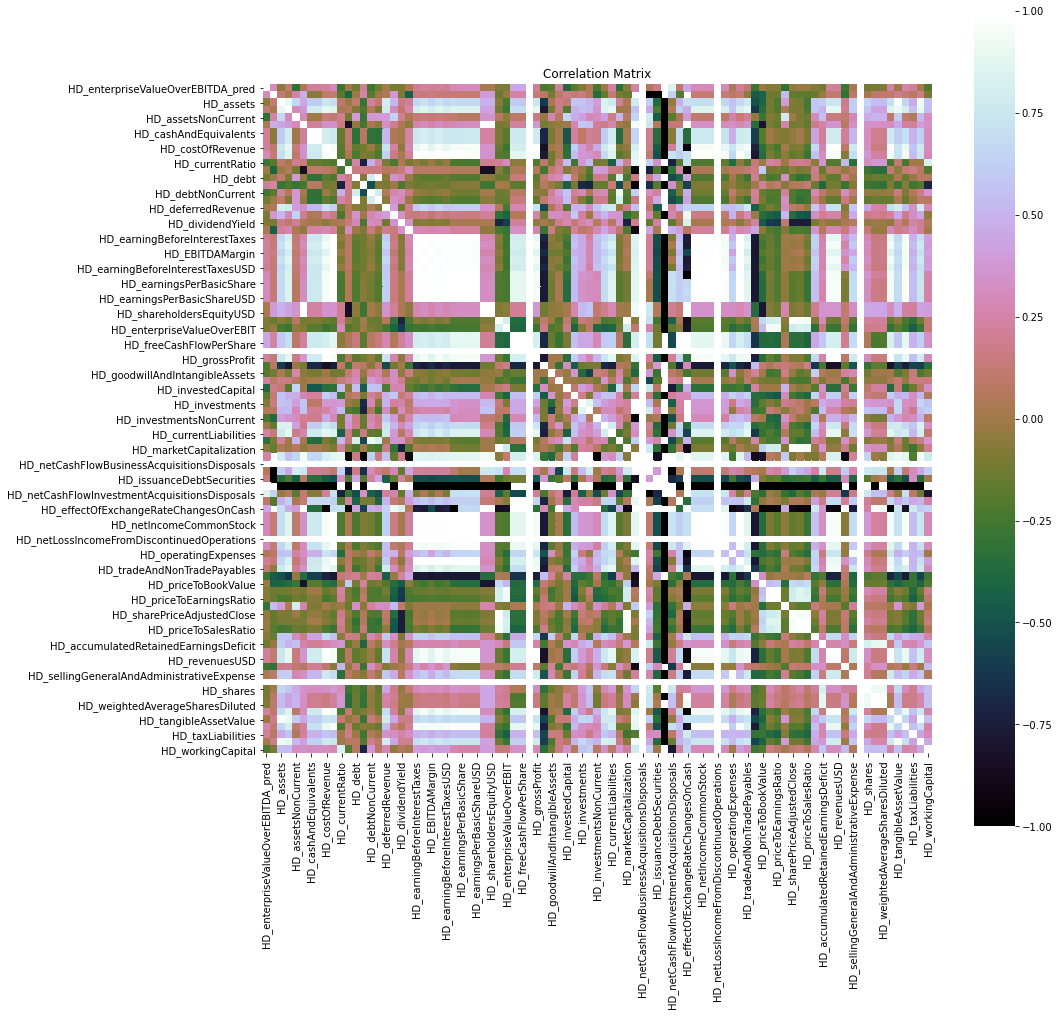

In [19]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=False,cmap='cubehelix')


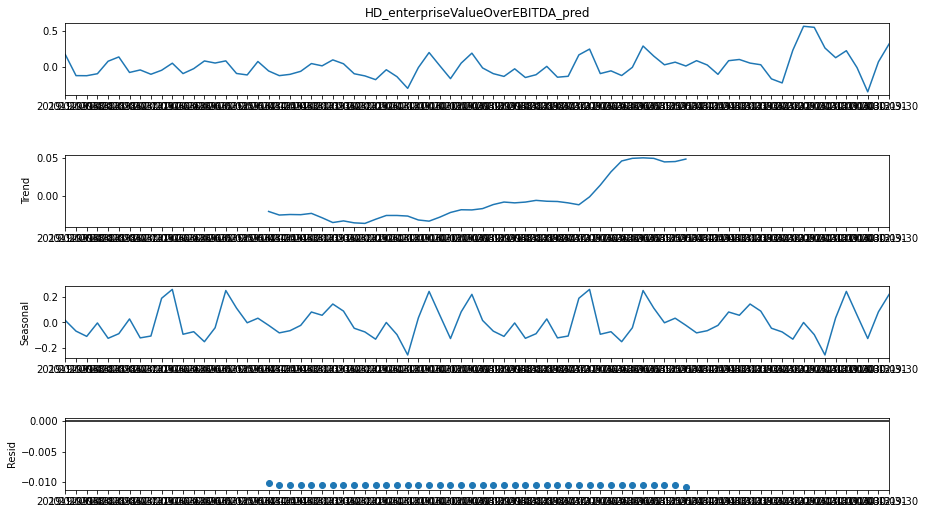

In [16]:
res = sm.tsa.seasonal_decompose(Y,freq=39) 
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [ ]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)] 
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [ ]:
num_folds = 10
scoring = 'neg_mean_squared_error'


In [ ]:
date_df = pd.DataFrame()
for ticker in tickers:
    date_df = pd.concat([date_df,test_df[f'{ticker}_calendarDate']], axis=1, join='outer')

date_df


,HD_calendarDate,LOW_calendarDate,CAT_calendarDate,KR_calendarDate,WMT_calendarDate
0,2019-12-31,2019-12-31,2019-12-31,2020-03-31,2019-12-31
1,2019-09-30,2019-09-30,2019-09-30,2019-12-31,2019-09-30
2,2019-06-30,2019-06-30,2019-06-30,2019-09-30,2019-06-30
3,2019-03-31,2019-03-31,2019-03-31,2019-06-30,2019-03-31
4,2018-12-31,2018-12-31,2018-12-31,2019-03-31,2018-12-31
5,2018-09-30,2018-09-30,2018-09-30,2018-12-31,2018-09-30
6,2018-06-30,2018-06-30,2018-06-30,2018-09-30,2018-06-30
7,2018-03-31,2018-03-31,2018-03-31,2018-06-30,2018-03-31
8,2017-12-31,2017-12-31,2017-12-31,2018-03-31,2017-12-31
9,2017-09-30,2017-09-30,2017-09-30,2017-12-31,2017-09-30


In [ ]:
balance_sheet_trend_analysis = test_df.copy()
balance_sheet_trend_analysis = balance_sheet_trend_analysis.set_index('ticker').T
balance_sheet_trend_analysis

ticker,HD,HD,HD,HD,HD,HD,HD,HD,HD,HD,...,WMT,WMT,WMT,WMT,WMT,WMT,WMT,WMT,WMT,WMT
period,Q,Q,Q,Q,Q,Q,Q,Q,Q,Q,...,Q,Q,Q,Q,Q,Q,Q,Q,Q,Q
cashAndEquivalentsUSD,2133000000,2193000000,2547000000,1882000000,1778000000,1764000000,3490000000,3599000000,3595000000,3549000000,...,8643000000,7935000000,8117000000,6550000000,7063000000,8102000000,9400000000,7395000000,10616000000,10195000000
investmentsCurrent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
assetsCurrent,19810000000,21174000000,20699000000,20553000000,18529000000,19809000000,20802000000,21214000000,18933000000,19682000000,...,63431000000,56259000000,57276000000,54975000000,59271000000,55414000000,55958000000,51893000000,59568000000,53045000000
debtToEquityRatio,-17.443,-49.345,-45.836,-25.039,-24.431,33.242,22.012,26.653,29.625,16.705,...,1.722,1.721,1.786,1.65,1.841,1.778,1.816,1.596,1.814,1.702
debtUSD,37377000000,35051000000,34473000000,34198000000,29202000000,25784000000,25498000000,25793000000,27028000000,25589000000,...,57457000000,54623000000,54626000000,53427000000,59236000000,57078000000,55666000000,49864000000,56794000000,49233000000
dividendYield,0.031,0.023,0.022,0.023,0.023,0.024,0.019,0.02,0.021,0.019,...,0.022,0.021,0.023,0.024,0.025,0.027,0.025,0.024,0.022,0.023
earningsBeforeInterestTaxesDepreciationAmortizationUSD,3998000000,4541000000,5456000000,4144000000,3927000000,4411000000,5431000000,3913000000,3718000000,4198000000,...,8058000000,8730000000,8379000000,10220000000,7818000000,8311000000,7746000000,10928000000,7397000000,7980000000
EBITDAMargin,0.155,0.167,0.177,0.157,0.148,0.168,0.178,0.157,0.156,0.168,...,0.071,0.076,0.074,0.083,0.071,0.076,0.074,0.094,0.073,0.077
shareholdersEquityUSD,-3116000000,-1082000000,-1160000000,-2143000000,-1878000000,1320000000,2009000000,1687000000,1454000000,2543000000,...,73891000000,70278000000,68964000000,71315000000,67163000000,67941000000,65006000000,68542000000,65525000000,64646000000
